# Python for scientific computing [[Source](https://github.com/ML-course/master/tree/master/notebooks)]
Python has extensive packages to help with data analysis:

* numpy: matrices, linear algebra, Fourier transform, pseudorandom number generators
* scipy: advanced linear algebra and maths, signal processing, statistics
* pandas: DataFrames, data wrangling and analysis
* matplotlib: visualizations such as line charts, histograms, scatter plots.

In [2]:
# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## NumPy
NumPy is the fundamental package required for high performance scientific computing in Python. It provides:

* `ndarray`: fast and space-efficient n-dimensional numeric array with vectorized arithmetic operations
* Functions for fast operations on arrays without having to write loops
* Linear algebra, random number generation, Fourier transform
* Integrating code written in C, C++, and Fortran (for faster operations)

`pandas` provides a richer, simpler interface to many operations. We'll focus on using `ndarrays` here because they are heavily used in scikit-learn.

### ndarrays
There are several ways to create numpy arrays.

In [3]:
# Convert normal Python array to 1-dimensional numpy array
np.array((1, 2, 53))

array([ 1,  2, 53])

In [4]:
# Convert sequences of sequences of sequences ... to n-dim array
np.array([(1.5, 2, 3), (4, 5, 6)])

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

In [5]:
# Define element type at creation time
np.array([[1, 2], [3, 4]], dtype=complex)

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Useful properties of ndarrays:

In [6]:
my_array = np.array([[1, 0, 3], [0, 1, 2]])
my_array.ndim     # number of dimensions (axes), also called the rank
my_array.shape    # a matrix with n rows and m columns has shape (n,m)
my_array.size     # the total number of elements of the array
my_array.dtype    # type of the elements in the array
my_array.itemsize # the size in bytes of each element of the array

8

Quick array creation.  
It is cheaper to create an array with placeholders than extending it later.

In [7]:
np.ones(3) # Default type is float64
np.zeros([2, 2])
np.empty([2, 2]) # Fills the array with whatever sits in memory
np.random.random((2,3))
np.random.randint(5, size=(2, 4))

array([[4, 2, 2, 4],
       [3, 1, 4, 1]])

Create sequences of numbers

In [8]:
np.linspace(0, 1, num=6)   # Linearly distributed numbers between 0 and 1
np.arange(0, 1, step=0.3)  # Fixed step size
np.arange(12).reshape(3,4) # Create and reshape
np.eye(4)                  # Identity matrix

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### Basic Operations
Arithmetic operators on arrays apply elementwise. A new array is created and filled with the result. Some operations, such as += and *=, act in place to modify an existing array rather than create a new one.

In [9]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
a, b    # Just printing
a-b
b**2
a > 32
a += 1
a

array([21, 31, 41, 51])

The product operator * operates elementwise.  
The matrix product can be performed using dot()

In [10]:
A, B = np.array([[1,1], [0,1]]), np.array([[2,0], [3,4]]) # assign multiple variables in one line
A
B
A * B
np.dot(A, B)

array([[5, 4],
       [3, 4]])

Upcasting: Operations with arrays of different types choose the more general/precise one.

In [11]:
a = np.ones(3, dtype=int) # initialize to integers
b = np.linspace(0, np.pi, 3) # default type is float
a.dtype, b.dtype, (a + b).dtype

(dtype('int64'), dtype('float64'), dtype('float64'))

ndarrays have most unary operations (max,min,sum,...) built in

In [12]:
a = np.random.random((2,3))
a
a.sum(), a.min(), a.max()

(3.103473418393568, 0.04442507304328469, 0.9669078358612619)

By specifying the axis parameter you can apply an operation along a specified axis of an array

In [13]:
b = np.arange(12).reshape(3,4)
b
b.sum()
b.sum(axis=0)
b.sum(axis=1)

array([ 6, 22, 38])

### Universal Functions

NumPy provides familiar mathematical functions such as sin, cos, exp, sqrt, floor,... In NumPy, these are called "universal functions" (ufunc), and operate elementwise on an array, producing an array as output.

In [14]:
np.sin(np.arange(0, 10))

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

### Shape Manipulation
Transpose, flatten, reshape,...

In [15]:
a = np.floor(10*np.random.random((3,4)))
a
a.transpose()
b = a.ravel() # flatten array
b
b.reshape(3, -1) # reshape in 3 rows (and as many columns as needed)

array([[7., 9., 0., 6.],
       [7., 9., 2., 0.],
       [8., 8., 2., 8.]])

Arrays can be split and stacked together

In [16]:
a = np.floor(10*np.random.random((2,6)))
a
b, c = np.hsplit(a, 2) # Idem: vsplit for vertical splits
b
c
np.hstack((b, c)) # Idenm: vstack for vertical stacks

array([[1., 1., 5., 4., 6., 7.],
       [3., 5., 4., 7., 1., 1.]])

### Indexing and Slicing

Arrays can be indexed and sliced using [start:stop:stepsize]. Defaults are [0:ndim:1]

In [17]:
a = np.arange(10)**2
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [ ]:
a[2]

4

In [ ]:
a[3:10:2]

array([ 9, 25, 49, 81])

In [ ]:
a[::-1] # Defaults are used if indices not stated

array([81, 64, 49, 36, 25, 16,  9,  4,  1,  0])

In [ ]:
a[::2]

array([ 0,  4, 16, 36, 64])

For multi-dimensional arrays, axes are comma-separated: [x,y,z].

In [ ]:
b = np.arange(16).reshape(4,4)
b
b[2,3] # row 2, column 3

11

In [ ]:
b[0:3,1] # Values 0 to 3 in column 1
b[ : ,1] # The whole column 1

array([ 1,  5,  9, 13])

In [ ]:
b[1:3, : ] # Rows 1:3, all columns

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
# Return the last row
b[-1]

array([12, 13, 14, 15])

Note: dots (...) represent as many colons (:) as needed
* x[1,2,...] = x[1,2,:,:,:]
* x[...,3] = x[:,:,:,:,3]
* x[4,...,5,:] = x[4,:,:,5,:]

Arrays can also be indexed by arrays of integers and booleans.

In [ ]:
a = np.arange(12)**2
i = np.array([ 1,1,3,8,5 ])
a
a[i]

array([ 1,  1,  9, 64, 25])

A matrix of indices returns a matrix with the corresponding values.

In [ ]:
j = np.array([[ 3, 4], [9, 7]])
a[j]

array([[ 9, 16],
       [81, 49]])

With boolean indices we explicitly choose which items in the array we want and which ones we don't.

In [ ]:
a = np.arange(12).reshape(3,4)
a
a[np.array([False,True,True]), :]
b = a > 4
b
a[b]

array([ 5,  6,  7,  8,  9, 10, 11])

### Iterating
Iterating is done with respect to the first axis:

In [ ]:
for row in b:
    print(row)

[False False False False]
[False  True  True  True]
[ True  True  True  True]


Operations on each element can be done by flattening the array (or nested loops)

In [ ]:
for element in b.flat: # flat returns an iterator
    print(element)

False
False
False
False
False
True
True
True
True
True
True
True


### Copies and Views (or: how to shoot yourself in a foot)
Assigning an array to another variable does NOT create a copy

In [ ]:
a = np.arange(12)
b = a
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
b[0] = -100
b

array([-100,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11])

In [ ]:
a

array([-100,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11])

The view() method creates a NEW array object that looks at the same data.

In [ ]:
a = np.arange(12)
a
c = a.view()
c.resize((2, 6))
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [ ]:
a[0] = 123
c # c is also changed now

array([[123,   1,   2,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11]])

Slicing an array returns a view of it.

In [ ]:
c
s = c[ : , 1:3]
s[:] = 10
s
c

array([[123,  10,  10,   3,   4,   5],
       [  6,  10,  10,   9,  10,  11]])

The copy() method makes a deep copy of the array and its data.

In [ ]:
d = a.copy()
d[0] = -42
d

array([-42,  10,  10,   3,   4,   5,   6,  10,  10,   9,  10,  11])

In [ ]:
a

array([123,  10,  10,   3,   4,   5,   6,  10,  10,   9,  10,  11])

### Numpy: further reading

* Numpy Tutorial: http://wiki.scipy.org/Tentative_NumPy_Tutorial
* "Python for Data Analysis" by Wes McKinney (O'Reilly)

## SciPy
SciPy is a collection of packages for scientific computing, among others:

* scipy.integrate: numerical integration and differential equation solvers
* scipy.linalg: linear algebra routines and matrix decompositions
* scipy.optimize: function optimizers (minimizers) and root finding algorithms
* scipy.signal: signal processing tools
* scipy.sparse: sparse matrices and sparse linear system solvers
* scipy.stats: probability distributions, statistical tests, descriptive statistics

### Sparse matrices
Sparse matrices are used in scikit-learn for (large) arrays that contain mostly zeros. You can convert a dense (numpy) matrix to a sparse matrix.

In [ ]:
from scipy import sparse
eye = np.eye(4)
eye
sparse_matrix = sparse.csr_matrix(eye) # Compressed Sparse Row matrix
sparse_matrix
print("{}".format(sparse_matrix))

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


When the data is too large, you can create a sparse matrix by passing the values and coordinates (COO format).

In [ ]:
data = np.ones(4)                         # [1,1,1,1]
row_indices = col_indices = np.arange(4)  # [0,1,2,3]
col_indices = np.arange(4) * 2
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("{}".format(eye_coo))

  (0, 0)	1.0
  (1, 2)	1.0
  (2, 4)	1.0
  (3, 6)	1.0


### Further reading
Check the [SciPy reference guide](https://docs.scipy.org/doc/scipy/reference/) for tutorials and examples of all SciPy capabilities.

## pandas
pandas is a Python library for data wrangling and analysis. It provides:

* ``DataFrame``: a table, similar to an R DataFrame that holds any structured data
    * Every column can have its own data type (strings, dates, floats,...)
* A great range of methods to apply to this table (sorting, querying, joining,...)
* Imports data from a wide range of data formats (CSV, Excel) and databases (e.g. SQL)

### Series
A one-dimensional array of data (of any numpy type), with indexed values. It can be created by passing a Python list or dict, a numpy array, a csv file,...

In [ ]:
import pandas as pd
pd.Series([1,3,np.nan]) # Default indices are integers
pd.Series([1,3,5], index=['a','b','c'])
pd.Series({'a' : 1, 'b': 2, 'c': 3 }) # when given a dict, the keys will be used for the index
pd.Series({'a' : 1, 'b': 2, 'c': 3 }, index = ['b', 'c', 'd']) # this will try to match labels with keys

b    2.0
c    3.0
d    NaN
dtype: float64

Functions like a numpy array, however with index labels as indices

In [ ]:
a = pd.Series({'a' : 1, 'b': 2, 'c': 3 })
a
a['b']       # Retrieves a value
a[['a','b']] # and can also be sliced

a    1
b    2
dtype: int64

numpy array operations on Series preserve the index value

In [ ]:
a
a[a > 1]
a * 2
np.sqrt(a)

a    1.000000
b    1.414214
c    1.732051
dtype: float64

Operations over multiple Series will align the indices

In [ ]:
a = pd.Series({'John' : 1000, 'Mary': 2000, 'Andre': 3000 })
b = pd.Series({'John' : 100, 'Andre': 200, 'Cecilia': 300 })
a + b

Andre      3200.0
Cecilia       NaN
John       1100.0
Mary          NaN
dtype: float64

### DataFrame
A DataFrame is a tabular data structure with both a row and a column index. It can be created by passing a dict of arrays, a csv file,...

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Nevada', 'Nevada'], 'year': [2000, 2001, 2001, 2002],
'pop': [1.5, 1.7, 2.4, 2.9]}
pd.DataFrame(data)
pd.DataFrame(data, columns=['year', 'state', 'pop', 'color']) # Will match indices

,year,state,pop,color
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2001,Nevada,2.4,NaN
3,2002,Nevada,2.9,NaN


It can be composed with a numpy array and row and column indices, and decomposed

In [ ]:
dates = pd.date_range('20130101',periods=4)
df = pd.DataFrame(np.random.randn(4,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.279229,0.014442,1.206311,0.444963
2013-01-02,-0.836939,-1.328902,0.361891,-0.621461
2013-01-03,-0.647378,-2.271949,0.122788,-0.726806
2013-01-04,0.569523,-0.378494,0.881282,-1.589848


In [ ]:
df.index
df.columns
df.values

array([[-0.27922882,  0.01444176,  1.20631052,  0.44496293],
       [-0.83693931, -1.32890157,  0.36189055, -0.62146103],
       [-0.64737828, -2.2719488 ,  0.12278808, -0.72680583],
       [ 0.56952335, -0.37849357,  0.88128234, -1.58984755]])

DataFrames can easily read/write data from/to files

* `read_csv(source)`: load CSV data from file or url
* `read_table(source, sep=',')`: load delimited data with separator
* `df.to_csv(target)`: writes the DataFrame to a file

In [ ]:
df.to_csv('data.csv', index=False) # Don't export the row index
dfs = pd.read_csv('data.csv')
dfs
dfs.at[0, 'A'] = 10 # Set value in row 0, column 'A' to '10'
dfs.to_csv('data.csv', index=False)

### Simple operations

In [ ]:
df.head() # First 5 rows
df.tail() # Last 5 rows

,A,B,C,D
2013-01-01,-0.279229,0.014442,1.206311,0.444963
2013-01-02,-0.836939,-1.328902,0.361891,-0.621461
2013-01-03,-0.647378,-2.271949,0.122788,-0.726806
2013-01-04,0.569523,-0.378494,0.881282,-1.589848


In [ ]:
# Quick stats
df.describe()

,A,B,C,D
count,4.000000,4.000000,4.000000,4.000000
mean,-0.298506,-0.991226,0.643068,-0.623288
std,0.623289,1.023244,0.491169,0.833890
min,-0.836939,-2.271949,0.122788,-1.589848
25%,-0.694769,-1.564663,0.302115,-0.942566
50%,-0.463304,-0.853698,0.621586,-0.674133
75%,-0.067041,-0.280260,0.962539,-0.354855
max,0.569523,0.014442,1.206311,0.444963


In [ ]:
# Transpose
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04
A,-0.279229,-0.836939,-0.647378,0.569523
B,0.014442,-1.328902,-2.271949,-0.378494
C,1.206311,0.361891,0.122788,0.881282
D,0.444963,-0.621461,-0.726806,-1.589848


In [ ]:
df
df.sort_index(axis=1, ascending=False) # Sort by index labels
df.sort_values(by='B') # Sort by values

,A,B,C,D
2013-01-03,-0.647378,-2.271949,0.122788,-0.726806
2013-01-02,-0.836939,-1.328902,0.361891,-0.621461
2013-01-04,0.569523,-0.378494,0.881282,-1.589848
2013-01-01,-0.279229,0.014442,1.206311,0.444963


### Selecting and slicing

In [ ]:
df['A'] # Get single column by label
df.A    # Shorthand

2013-01-01   -0.279229
2013-01-02   -0.836939
2013-01-03   -0.647378
2013-01-04    0.569523
Freq: D, Name: A, dtype: float64

In [ ]:
df[0:2]          # Get rows by index number
df.iloc[0:2,0:2] # Get rows and columns by index number
df['20130102':'20130103']                # or row label
df.loc['20130101':'20130103', ['A','B']] # or row and column label

,A,B
2013-01-01,-0.279229,0.014442
2013-01-02,-0.836939,-1.328902
2013-01-03,-0.647378,-2.271949


query() retrieves data matching a boolean expression

In [ ]:
df
df.query('A > -0.4') # Identical to df[df.A > 0.4]
df.query('A > B')   # Identical to df[df.A > df.B]

,A,B,C,D
2013-01-02,-0.836939,-1.328902,0.361891,-0.621461
2013-01-03,-0.647378,-2.271949,0.122788,-0.726806
2013-01-04,0.569523,-0.378494,0.881282,-1.589848


Note: similar to NumPy, indexing and slicing returns a _view_ on the data. Use copy() to make a deep copy.

### Operations
DataFrames offer a [wide range of operations](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html): max, mean, min, sum, std,...

In [ ]:
df.mean()       # Mean of all values per column
df.mean(axis=1) # Other axis: means per row

2013-01-01    0.346622
2013-01-02   -0.606353
2013-01-03   -0.880836
2013-01-04   -0.129384
Freq: D, dtype: float64

All of numpy's universal functions also work with dataframes

In [ ]:
np.abs(df)

,A,B,C,D
2013-01-01,0.279229,0.014442,1.206311,0.444963
2013-01-02,0.836939,1.328902,0.361891,0.621461
2013-01-03,0.647378,2.271949,0.122788,0.726806
2013-01-04,0.569523,0.378494,0.881282,1.589848


Other (custom) functions can be applied with apply(funct)

In [ ]:
df
df.apply(np.max)
df.apply(lambda x: x.max() - x.min())

A    1.406463
B    2.286391
C    1.083522
D    2.034810
dtype: float64

Data can be aggregated with groupby()

In [ ]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar'], 'B' : ['one', 'one', 'two', 'three'],
                   'C' : np.random.randn(4), 'D' : np.random.randn(4)})
df
df.groupby('A').sum()
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.616006 -1.040805
    three  0.959403 -0.993623
foo one    1.202516 -1.039395
    two   -1.832403 -1.605941

### Data wrangling (some examples)
Merge: combine two dataframes based on common keys

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a'], 'data1': range(3)})
df2 = pd.DataFrame({'key': ['a', 'b'], 'data2': range(2)})
df1
df2
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0


Append: append one dataframe to another

In [ ]:
df = pd.DataFrame(np.random.randn(2, 4))
df
s = pd.DataFrame(np.random.randn(1,4))
s
df = pd.concat([df,s], ignore_index=True)

Remove duplicates

In [ ]:
df = pd.DataFrame({'k1': ['one'] * 3, 'k2': [1, 1, 2]})
df
df.drop_duplicates()

,k1,k2
0,one,1
2,one,2


Replace values

In [ ]:
df = pd.DataFrame({'k1': [1, -1], 'k2': [-1, 2]}) # Say that -1 is a sentinel for missing data
df
df.replace(-1, np.nan)

,k1,k2
0,1.0,NaN
1,NaN,2.0


Discretization and binning

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats.categories
pd.value_counts(cats)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

### Further reading

* Pandas docs: http://pandas.pydata.org/pandas-docs/stable/
* https://bitbucket.org/hrojas/learn-pandas
* Python for Data Analysis (O'Reilly) by Wes McKinney (the author of pandas)          

## matplotlib
[matplotlib](http://matplotlib.sourceforge.net) is the primary scientific plotting library in Python. It provides:

* Publication-quality [visualizations](http://matplotlib.org/gallery.html) such as line charts, histograms, and scatter plots.
* Integration in pandas to make plotting much easier.
* Interactive plotting in Jupyter notebooks for quick visualizations.
    * Requires some setup. See preamble and [%matplotlib](http://ipython.readthedocs.io/en/stable/interactive/plotting.html?highlight=matplotlib).
* Many GUI backends, export to PDF, SVG, JPG, PNG, BMP, GIF, etc.
* Ecosystem of libraries for more advanced plotting, e.g. [Seaborn](http://seaborn.pydata.org/)

### Low-level usage
`plot()` is the [main function](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) to generate a plot (but many more exist):
```
plot(x, y)        Plot x vs y, default settings
plot(x, y, 'bo')  Plot x vs y, blue circle markers
plot(y, 'r+')     Plot y (x = array 0..N-1), red plusses
```

Every plotting function is completely customizable through a large set of options.

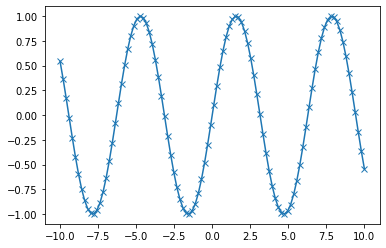

In [ ]:
x = np.linspace(-10, 10, 100) # Sequence for X-axis
y = np.sin(x) # sine values
p = plt.plot(x, y, marker="x") # Line plot with marker x

### pandas + matplotlib
pandas DataFrames offer an easier, higher-level interface for matplotlib functions

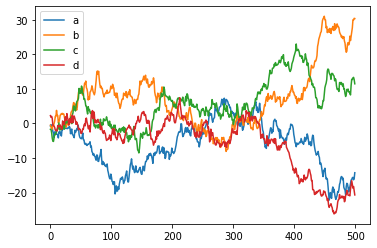

In [ ]:
df = pd.DataFrame(np.random.randn(500, 4),
                  columns=['a', 'b', 'c', 'd']) # random 4D data
p = df.cumsum() # Plot cumulative sum of all series
p.plot();

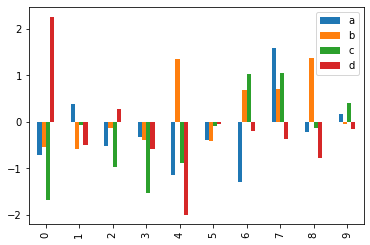

In [ ]:
p = df[:10].plot(kind='bar') # First 10 arrays as bar plots

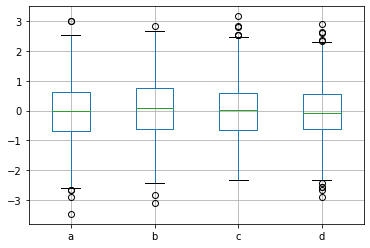

In [ ]:
p = df.boxplot() # Boxplot for each of the 4 series

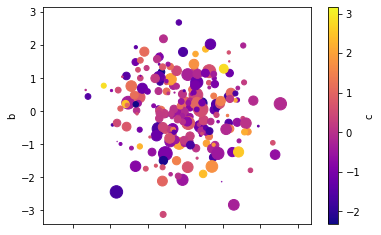

In [ ]:
# Scatter plot using the 4 series for x, y, color, scale
df.plot(kind='scatter', x='a', y='b', c='c', s=df['d']*72, cmap='plasma');

### Advanced plotting libraries
Several libraries, such as [Seaborn](http://seaborn.pydata.org/examples/index.html) offer more advanced plots and easier interfaces.
![Seaborn Examples](http://ksopyla.com/wp-content/uploads/2016/11/seaborn_examples.jpg)

### Further reading links

* [Matplotlib examples](http://matplotlib.org/gallery.html)
* [Plotting with pandas](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html)
* [Seaborn examples](http://seaborn.pydata.org/examples/index.html)

In [1]:
# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Why Python?
* Many data-heavy applications are now developed in Python
* Highly readable, less complexity, fast prototyping
* Easy to offload number crunching to underlying C/Fortran/...
* Easy to install and import many rich libraries
    - numpy: efficient data structures
    - scipy: fast numerical recipes
    - matplotlib: high-quality graphs
    - scikit-learn: machine learning algorithms
    - tensorflow: neural networks
    - ...

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/tut_ecosystem.jpg" alt="ml" style="width: 1000px;"/>

# Numpy, Scipy, Matplotlib
* We'll illustrate these with a practical example
* Many good tutorials online
    - [Jake VanderPlas' book and notebooks](https://github.com/jakevdp/PythonDataScienceHandbook)
    - [J.R. Johansson's notebooks](https://github.com/jrjohansson/scientific-python-lectures)
    - [DataCamp](https://www.datacamp.com)
    - ...

In [ ]:
from scipy.stats import gamma
np.random.seed(3)  # to reproduce the data

def gen_web_traffic_data():
    '''
    This function generates some fake data that first shows a weekly pattern
    for a couple weeks before it grows exponentially.
    '''
    # 31 days, 24 hours
    x = np.arange(1, 31*24)

    # Sine wave with weekly rhythm + noise + exponential increase
    y = np.array(200*(np.sin(2*np.pi*x/(7*24))), dtype=np.float32)
    y += gamma.rvs(15, loc=0, scale=100, size=len(x))
    y += 2 * np.exp(x/100.0)
    y = np.ma.array(y, mask=[y<0])

    return x, y

def plot_web_traffic(x, y, models=None, mx=None, ymax=None):
    '''
    Plot the web traffic (y) over time (x).

    If models is given, it is expected to be a list fitted models,
    which will be plotted as well (used later).
    '''
    plt.figure(figsize=(12,6), dpi=300) # width and height of the plot in inches
    plt.scatter(x, y, s=10)
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks([w*7*24 for w in range(20)],
               ['week %i' %w for w in range(20)])

    if models:
        colors = ['g', 'r', 'm', 'b', 'k']
        linestyles = ['-', '-.', '--', ':', '-']

        if mx is None:
            mx = np.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale()
    if ymax:
        plt.ylim(ymax=ymax)

    plt.grid()
    plt.ylim(ymin=0)

## Example: Modelling web traffic
* We generate some artificial data to mimic web traffic data
    - E.g. website visits, tweets with certain hashtag,...
    - Weekly rhythm + noise + exponential increase

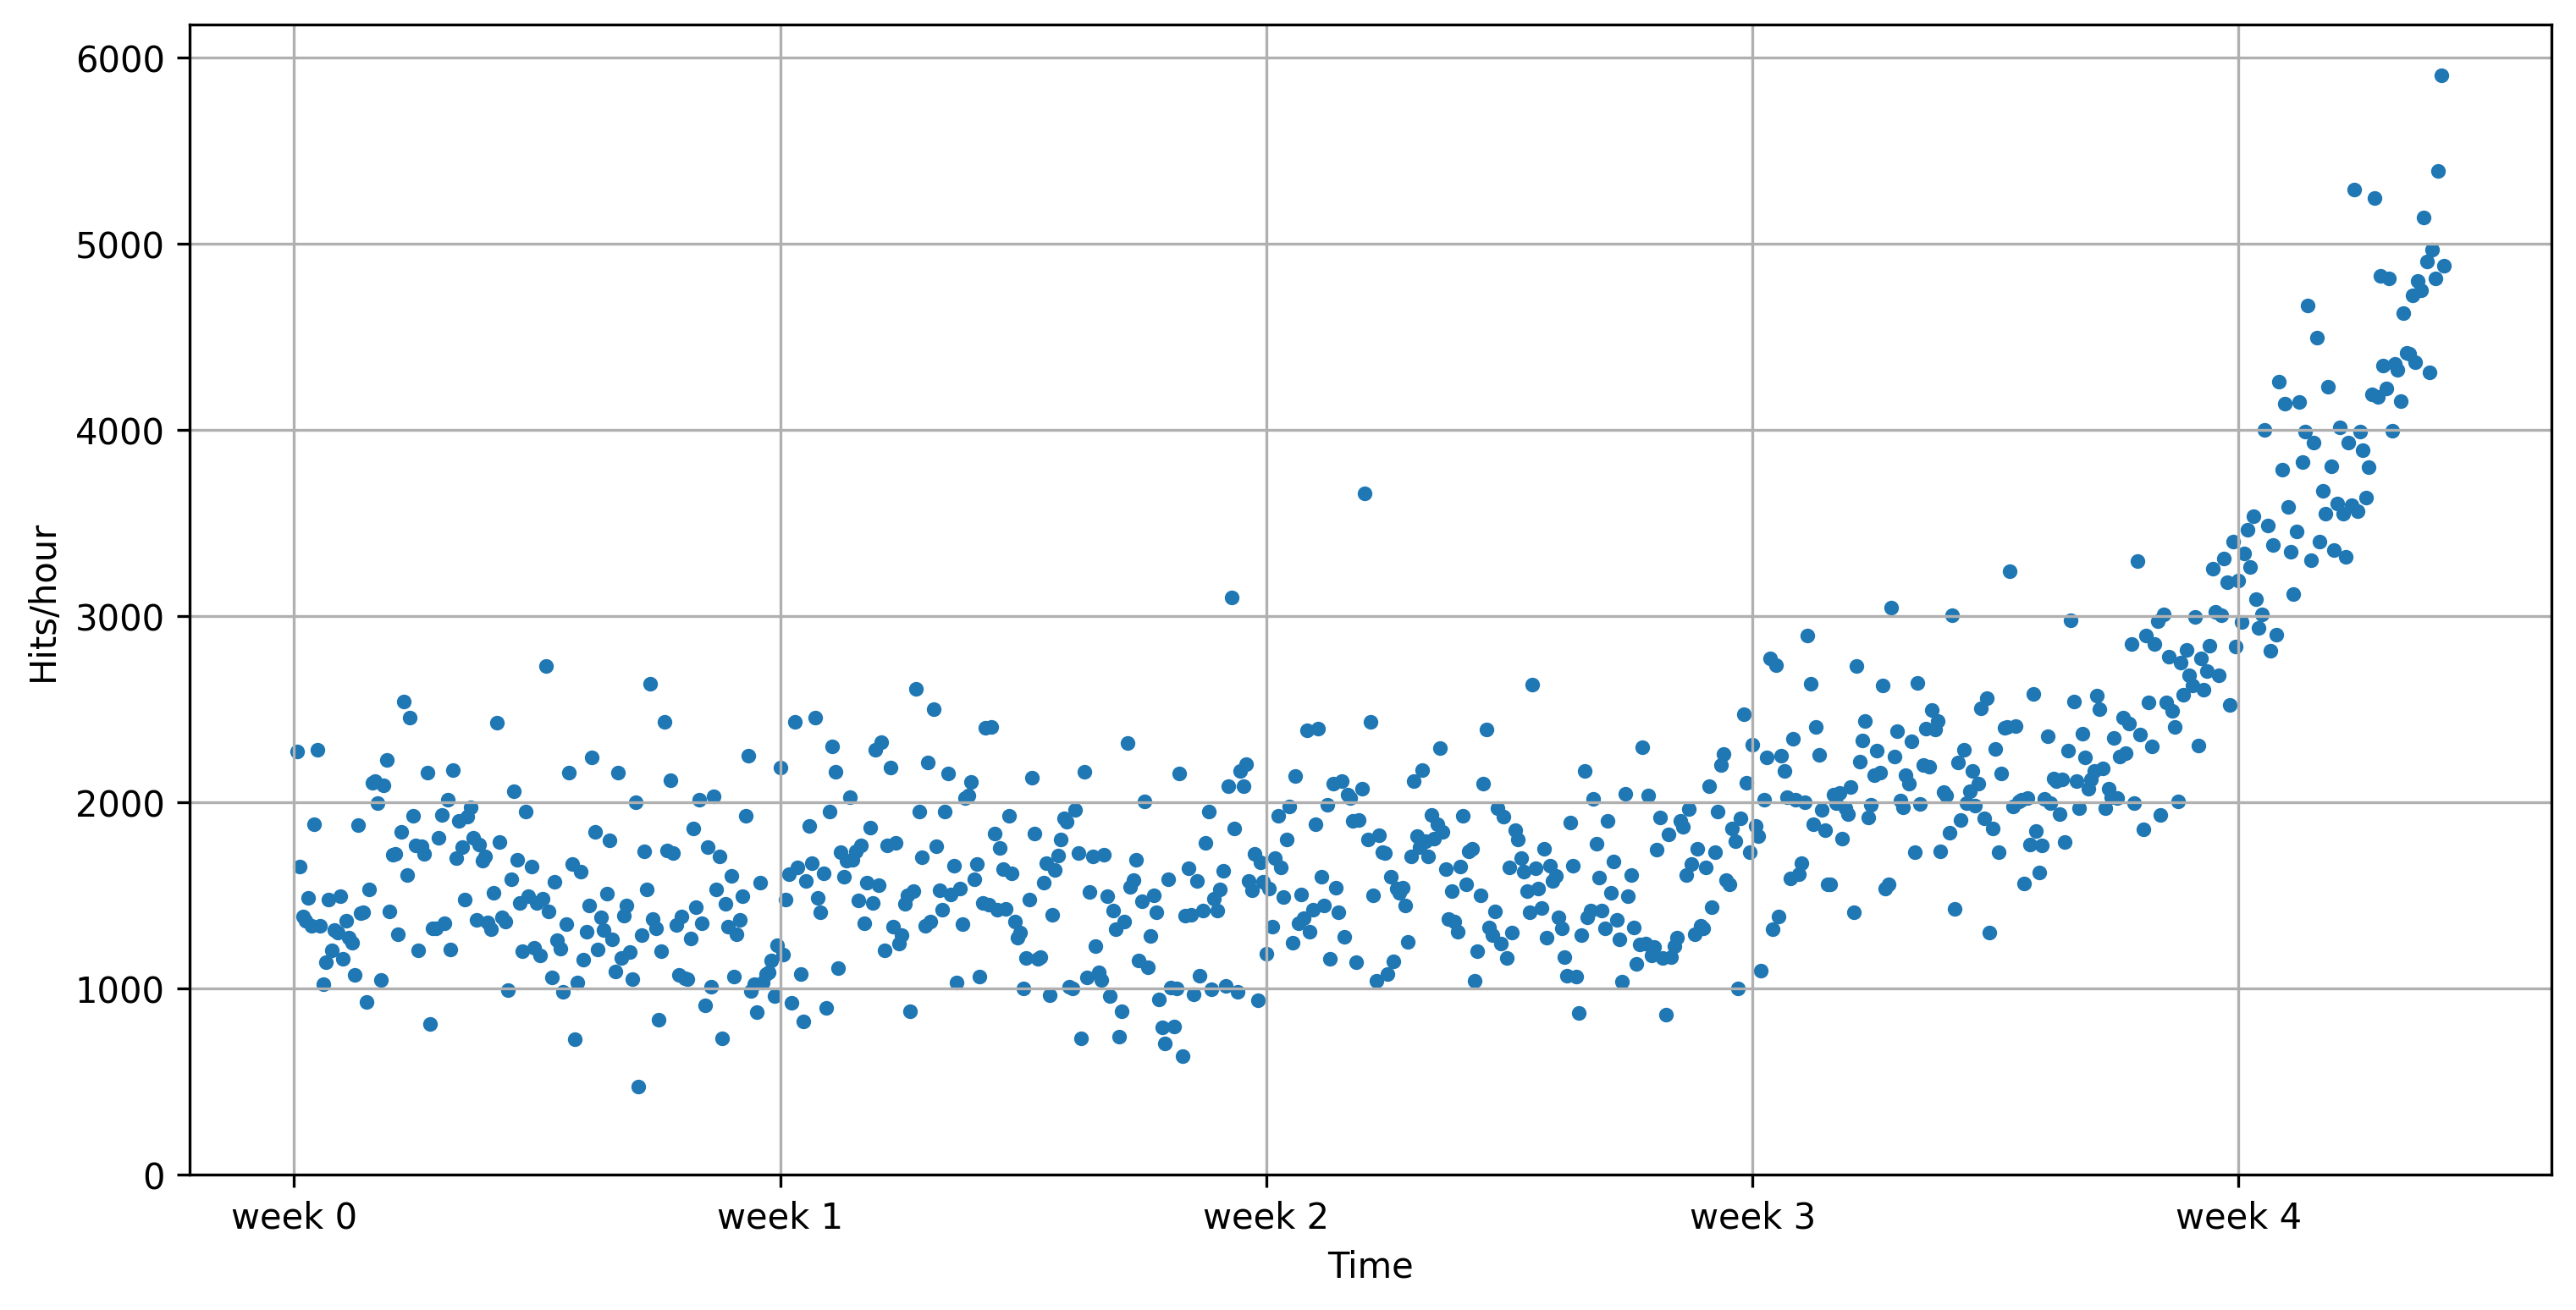

In [ ]:
x, y = gen_web_traffic_data()
plot_web_traffic(x, y)

### Use numpy to fit some polynomial lines
* `polyfit` fits a polynomial of degree d
*  `poly1d` evaluates the function using the learned coefficients
* Plot with matplotlib

```python
f2 = np.poly1d(np.polyfit(x, y, 2))
f10 = np.poly1d(np.polyfit(x, y, 10))
f50 = np.poly1d(np.polyfit(x, y, 50))

mx = np.linspace(0, x[-1], 1000)
plt.plot(mx, f2(mx))
```

/Users/jvanscho/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


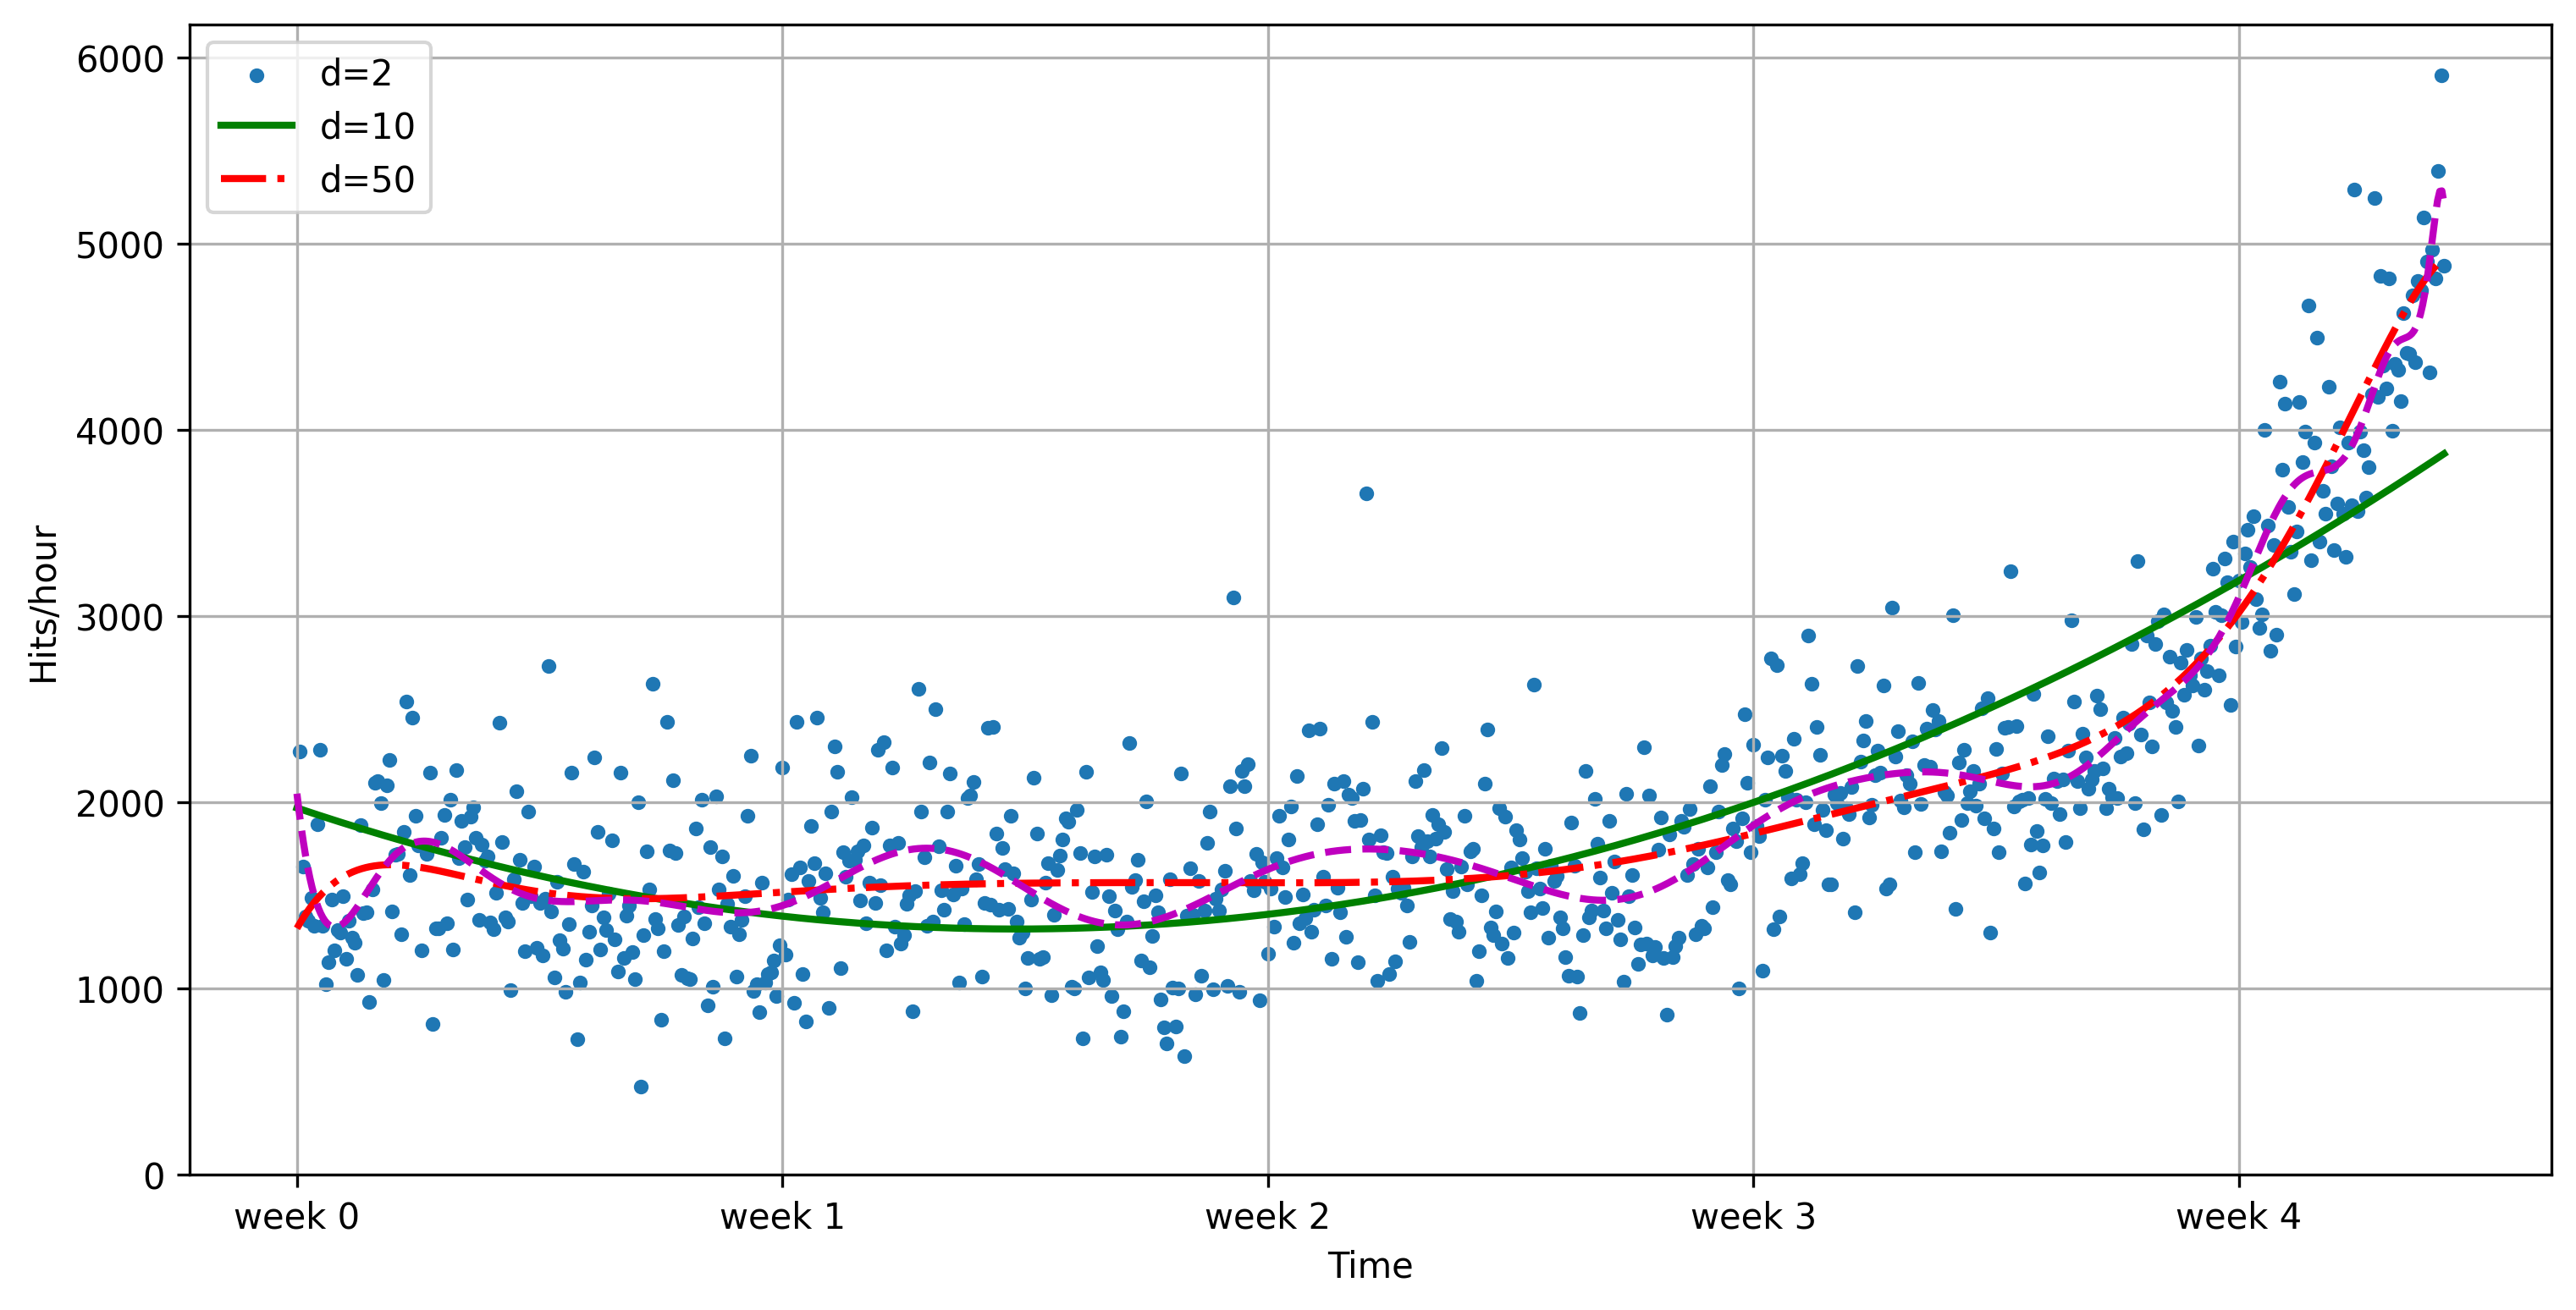

In [ ]:
f2 = np.poly1d(np.polyfit(x, y, 2))
f10 = np.poly1d(np.polyfit(x, y, 10))
f50 = np.poly1d(np.polyfit(x, y, 50))
plot_web_traffic(x, y, [f2,f10,f50])

### Evaluate
* Using root mean squared error: $\sqrt{\sum_i (f(x_i) - y_i)^2}$
* The degree of the polynomial needs to be tuned to the data
* Predictions don't look great. We need more sophisticated methods.

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

mx=np.linspace(0, 6 * 7 * 24, 100)

def error(f, x, y):
    return np.sqrt(np.sum((f(x)-y)**2))

@interact
def play_with_degree(degree=(1,30,2)):
    f = np.poly1d(np.polyfit(x, y, degree))
    plot_web_traffic(x, y, [f], mx=mx, ymax=10000)
    print("Training error for d=%i: %f" % (f.order, error(f, x, y)))

interactive(children=(IntSlider(value=15, description='degree', max=30, min=1, step=2), Output()), _dom_classe…

# scikit-learn
One of the most prominent Python libraries for machine learning:

* Contains many state-of-the-art machine learning algorithms
* Builds on numpy (fast), implements advanced techniques
* Wide range of evaluation measures and techniques
* Offers [comprehensive documentation](http://scikit-learn.org/stable/documentation) about each algorithm
* Widely used, and a wealth of [tutorials](http://scikit-learn.org/stable/user_guide.html) and code snippets are available
* Works well with numpy, scipy, pandas, matplotlib,...

**Note**: We'll repeat most of the material below in the lectures and labs on model selection and data preprocessing, but it's still very useful to study it beforehand.

## Algorithms
See the [Reference](http://scikit-learn.org/dev/modules/classes.html)

__Supervised learning:__

* Linear models (Ridge, Lasso, Elastic Net, ...)
* Support Vector Machines
* Tree-based methods (Classification/Regression Trees, Random Forests,...)
* Nearest neighbors
* Neural networks
* Gaussian Processes
* Feature selection

__Unsupervised learning:__
    
* Clustering (KMeans, ...)
* Matrix Decomposition (PCA, ...)
* Manifold Learning (Embeddings)
* Density estimation
* Outlier detection

__Model selection and evaluation:__

* Cross-validation
* Grid-search
* Lots of metrics

## Data import
Multiple options:

* A few toy datasets are included in `sklearn.datasets`
* Import 1000s of datasets via `sklearn.datasets.fetch_openml`
* You can import data files (CSV) with `pandas` or `numpy`

```python
from sklearn.datasets import load_iris, fetch_openml
iris_data = load_iris()
dating_data = fetch_openml(name="SpeedDating")
```

In [ ]:
from sklearn.datasets import load_iris, fetch_openml
iris_data = load_iris()
dating_data = fetch_openml("SpeedDating", version=1)

These will return a `Bunch` object (similar to a `dict`)

``` python
print("Keys of iris_dataset: {}".format(iris_dataset.keys()))
print(iris_dataset['DESCR'][:193] + "\n...")
```

In [ ]:
print("Keys of iris_dataset: {}".format(iris_data.keys()))
print(iris_data['DESCR'][:193] + "\n...")

Keys of iris_dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


* Targets (classes) and features are lists of strings
* Data and target values are always numeric (ndarrays)

``` python
print("Targets: {}".format(iris_data['target_names']))
print("Features: {}".format(iris_data['feature_names']))
print("Shape of data: {}".format(iris_data['data'].shape))
print("First 5 rows:\n{}".format(iris_data['data'][:5]))
print("Targets:\n{}".format(iris_data['target']))
```

In [ ]:
print("Targets: {}".format(iris_data['target_names']))
print("Features: {}".format(iris_data['feature_names']))
print("Shape of data: {}".format(iris_data['data'].shape))
print("First 5 rows:\n{}".format(iris_data['data'][:5]))
print("Targets:\n{}".format(iris_data['target']))

Targets: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of data: (150, 4)
First 5 rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Targets:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Building models
All scikitlearn _estimators_ follow the same interface

```python
class SupervisedEstimator(...):
    def __init__(self, hyperparam, ...):

    def fit(self, X, y):   # Fit/model the training data
        ...                # given data X and targets y
        return self
     
    def predict(self, X):  # Make predictions
        ...                # on unseen data X  
        return y_pred
    
    def score(self, X, y): # Predict and compare to true
        ...                # labels y                
        return score
```

### Training and testing data
To evaluate our classifier, we need to test it on unseen data.  
`train_test_split`: splits data randomly in 75% training and 25% test data.

``` python
X_train, X_test, y_train, y_test = train_test_split(
    iris_data['data'], iris_data['target'], random_state=0)
```

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_data['data'], iris_data['target'],
    random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


### Fitting a model

The first model we'll build is a k-Nearest Neighbor classifier.  
kNN is included in `sklearn.neighbors`, so let's build our first model

``` python
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
```

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Making predictions
Let's create a new example and ask the kNN model to classify it

``` python
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
class_name = iris_data['target_names'][prediction]
```

In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_data['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


### Evaluating the model
Feeding all test examples to the model yields all predictions

``` python
y_pred = knn.predict(X_test)
```

In [ ]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


The `score` function computes the percentage of correct predictions

``` python
knn.score(X_test, y_test)
```

In [ ]:
print("Score: {:.2f}".format(knn.score(X_test, y_test) ))

Score: 0.97


## Cross-validation

- More stable, thorough way to estimate generalization performance
- _k-fold cross-validation_ (CV): split (randomized) data into _k_ equal-sized parts, called _folds_
    - First, fold 1 is the test set, and folds 2-5 comprise the training set
    - Then, fold 2 is the test set, folds 1,3,4,5 comprise the training set
    - Compute _k_ evaluation scores, aggregate afterwards (e.g. take the mean)

### Cross-validation in scikit-learn

* `cross_val_score` function with learner, training data, labels
* Returns list of all scores
    * Does 3-fold CV by default, can be changed via `cv` hyperparameter
    * Default scoring measures are accuracy (classification) or $R^2$ (regression)
* Even though models are built internally, they are not returned

``` python
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Variance in cross-validation score: {:.4f}".format(np.var(scores)))
```

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

iris = load_iris()
knn = KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(knn, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Variance in cross-validation score: {:.4f}".format(np.var(scores)))

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Average cross-validation score: 0.96
Variance in cross-validation score: 0.0006


### More variants
* Stratified cross-validation: for inbalanced datasets
* Leave-one-out cross-validation: for very small datasets
* Shuffle-Split cross-validation: whenever you need to shuffle the data first
* Repeated cross-validation: more trustworthy, but more expensive
* Cross-validation with groups: Whenever your data contains non-independent datapoints, e.g. data points from the same patient
* Bootstrapping: sampling with replacement, for extracting statistical properties

### Avoid data leakage
- Simply taking the best performing model based on cross-validation performance yields optimistic results
- We've already used the test data to evaluate each model!
- Hence, we don't have an independent test set to evaluate these hyperparameter settings
    - Information 'leaks' from test set into the final model
- Solution: Set aside part of the training data to evaluate the hyperparameter settings
    - Select best model on validation set
    - Rebuild the model on the training+validation set
    - Evaluate optimal model on the test set

## Pipelines
* Many learning algorithms are greatly affected by _how_ you represent the training data
* Examples: Scaling, numeric/categorical values, missing values, feature selection/construction
* We typically need chain together different algorithms
    - Many _preprocessing_ steps
    - Possibly many models
* This is called a _pipeline_ (or _workflow_)
* The best way to represent data depends not only on the semantics of the data, but also on the kind of model you are using.

### Example: Speed dating data
* Data collected from speed dating events
* See https://www.openml.org/d/40536
* Could also be collected from dating website or app
* Real-world data:
    - Different numeric scales
    - Missing values
    - Likely irrelevant features
    - Different types: Numeric, categorical,...
    - Input errors (e.g. 'lawyer' vs 'Lawyer')
    
```
dating_data = fetch_openml("SpeedDating")
```

In [ ]:
dating_data = fetch_openml("SpeedDating", version=1)

### Scaling

When the features have different scales (their values range between very different minimum and maximum values), one feature will overpower the others. Several scaling techniques are available to solve this:  
- `StandardScaler` rescales all features to mean=0 and variance=1
    - Does not ensure and min/max value
- `RobustScaler` uses the median and quartiles
    - Median m: half of the values < m, half > m
    - Lower Quartile lq: 1/4 of values < lq
    - Upper Quartile uq: 1/4 of values > uq
    - Ignores _outliers_, brings all features to same scale
- `MinMaxScaler` brings all feature values between 0 and 1
- `Normalizer` scales data such that the feature vector has Euclidean length 1
    - Projects data to the unit circle
    - Used when only the direction/angle of the data matters

#### Applying scaling transformations
- Lets apply a scaling transformation _manually_, then use it to train a learning algorithm
- First, split the data in training and test set
- Next, we `fit` the preprocessor on the __training data__
    - This computes the necessary transformation parameters
    - For `MinMaxScaler`, these are the min/max values for every feature
- After fitting, we can `transform` the training and test data

```python
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

### Missing value imputation
* Many sci-kit learn algorithms cannot handle missing value
* `Imputer` replaces specific values
    * `missing_values` (default 'NaN') placeholder for the missing value
    * `strategy`:
        - `mean`, replace using the mean along the axis
        - `median`, replace using the median along the axis
        - `most_frequent`, replace using the most frequent value
* Many more advanced techniques exist, but not yet in scikit-learn
    * e.g. low rank approximations (uses matrix factorization)

``` python
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit_transform(X1_train)
```

### Feature encoding
* scikit-learn classifiers only handle numeric data. If your features are categorical, you need to encode them first
* `LabelEncoder` simply replaces each value with an integer value
* `OneHotEncoder` converts a feature of $n$ values to $n$ binary features
    * Provide `categories` as array or set to 'auto'
    
```python
X_enc = OneHotEncoder(categories='auto').fit_transform(X)

```

* `ColumnTransformer` can apply different transformers to different features
* Transformers can be pipelines doing multiple things

```python
numeric_features = ['age', 'pref_o_attractive']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['gender', 'd_d_age', 'field']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
```

## Building Pipelines
* In scikit-learn, a `pipeline` combines multiple processing _steps_ in a single estimator
* All but the last step should be transformer (have a `transform` method)
    * The last step can be a transformer too (e.g. Scaler+PCA)
* It has a `fit`, `predict`, and `score` method, just like any other learning algorithm
* Pipelines are built as a list of steps, which are (name, algorithm) tuples
    * The name can be anything you want, but can't contain `'__'`
    * We use `'__'` to refer to the hyperparameters, e.g. `svm__C`
* Let's build, train, and score a `MinMaxScaler` + `LinearSVC` pipeline:

``` python
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", LinearSVC())])
pipe.fit(X_train, y_train).score(X_test, y_test)
```

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", LinearSVC())])

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
pipe.fit(X_train, y_train)
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.97


* Now with cross-validation:
``` python
scores = cross_val_score(pipe, cancer.data, cancer.target)
```

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, cancer.data, cancer.target)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.98245614 0.97368421 0.96491228 0.96491228 0.99115044]
Average cross-validation score: 0.98


* We can retrieve the trained SVM by querying the right step indices
``` python
pipe.steps[1][1]
```

In [ ]:
pipe.fit(X_train, y_train)
print("SVM component: {}".format(pipe.steps[1][1]))

SVM component: LinearSVC()


* Or we can use the `named_steps` dictionary
``` python
pipe.named_steps['svm']
```

In [ ]:
print("SVM component: {}".format(pipe.named_steps['svm']))

SVM component: LinearSVC()


* When you don't need specific names for specific steps, you can use `make_pipeline`
    * Assigns names to steps automatically
``` python
pipe_short = make_pipeline(MinMaxScaler(), LinearSVC(C=100))
print("Pipeline steps:\n{}".format(pipe_short.steps))
```

In [ ]:
from sklearn.pipeline import make_pipeline
# abbreviated syntax
pipe_short = make_pipeline(MinMaxScaler(), LinearSVC(C=100))
print("Pipeline steps:\n{}".format(pipe_short.steps))

Pipeline steps:
[('minmaxscaler', MinMaxScaler()), ('linearsvc', LinearSVC(C=100))]


## Model selection and Hyperparameter tuning
* There are many algorithms to choose from
* Most algorithms have parameters (hyperparameters) that control model complexity
* Now that we know how to evaluate models, we can improve them selecting by `tuning` algorithms for your data

We can basically use any optimization technique to optimize hyperparameters:

- __Grid search__
- __Random search__

More advanced techniques:

- Local search
- Racing algorithms
- Bayesian optimization
- Multi-armed bandits
- Genetic algorithms

Grid vs Random Search
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/eval_gridrandom.png" alt="ml" style="width: 800px;"/>

### Grid Search

- For each hyperparameter, create a list of interesting/possible values
    - E.g. For kNN: k in [1,3,5,7,9,11,33,55,77,99]
    - E.g. For SVM: C and gamma in [$10^{-10}$..$10^{10}$]
- Evaluate all possible combinations of hyperparameter values
    - E.g. using cross-validation
- Split the training data into a training and validation set
- Select the hyperparameter values yielding the best results on the validation set

#### Grid search in scikit-learn
- Create a parameter grid as a dictionary
    - Keys are parameter names
    - Values are lists of hyperparameter values
    
``` python
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))
```

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


- `GridSearchCV`: like a classifier that uses CV to automatically optimize its hyperparameters internally
    - Input: (untrained) model, parameter grid, CV procedure
    - Output: optimized model on given training data
    - Should only have access to training data
    
``` python
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
```

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(
        iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

The optimized test score and hyperparameters can easily be retrieved:

``` python
grid_search.score(X_test, y_test)
grid_search.best_params_
grid_search.best_score_
grid_search.best_estimator_
```

In [ ]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.97
Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97
Best estimator:
SVC(C=10, gamma=0.1)


#### Nested cross-validation

- Note that we are still using a single split to create the outer test set
- We can also use cross-validation here
- Nested cross-validation:
    - Outer loop: split data in training and test sets
    - Inner loop: run grid search, splitting the training data into train and validation sets
- Result is a just a list of scores
    - There will be multiple optimized models and hyperparameter settings (not returned)
- To apply on future data, we need to train `GridSearchCV` on all data again

``` python
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
```

In [ ]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean cross-validation score:  0.9800000000000001


### Random Search

- Grid Search has a few downsides:
    - Optimizing many hyperparameters creates a combinatorial explosion
    - You have to predefine a grid, hence you may jump over optimal values
- Random Search:
    - Picks `n_iter` random parameter values
    - Scales better, you control the number of iterations
    - Often works better in practice, too
        - not all hyperparameters interact strongly
        - you don't need to explore all combinations

- Executing random search in scikit-learn:
    - `RandomizedSearchCV` works like `GridSearchCV`
    - Has `n_iter` parameter for the number of iterations
    - Search grid can use distributions instead of fixed lists
    
``` python
param_grid = {'C': expon(scale=100),
              'gamma': expon(scale=.1)}
random_search = RandomizedSearchCV(SVC(), param_distributions=param_grid,
                                   n_iter=20)
random_search.fit(X_train, y_train)
random_search.best_estimator_
```

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

param_grid = {'C': expon(scale=100),
              'gamma': expon(scale=.1)}
random_search = RandomizedSearchCV(SVC(), param_distributions=param_grid,
                                   n_iter=20)
X_train, X_test, y_train, y_test = train_test_split(
        iris.data, iris.target, random_state=0)
random_search.fit(X_train, y_train)
random_search.best_estimator_

SVC(C=210.39084256954456, gamma=0.003623016212739808)

### Using Pipelines in Grid-searches
* We can use the pipeline as a single estimator in `cross_val_score` or `GridSearchCV`
* To define a grid, refer to the hyperparameters of the steps
    * Step `svm`, parameter `C` becomes `svm__C`
    
```python
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
pipe = pipeline.Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
```

In [ ]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
from sklearn import pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


pipe = pipeline.Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.96
Test set score: 0.97
Best parameters: {'svm__C': 1, 'svm__gamma': 10}


## Automated Machine Learning
* Optimizes both the pipeline and all hyperparameters
* E.g. auto-sklearn
    - Drop-in sklearn classifier
    - Also optimizes pipelines (e.g. feature selection)
    - Uses OpenML to find good models on similar datasets
    - Lacks Windows support
    
```python
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=60, # sec., for entire process
    per_run_time_limit=15, # sec., for each model
    ml_memory_limit=1024, # MB, memory limit
)
automl.fit(X_train, y_train)
```

## Introduction to tsfresh
The following code demonstrates how to use the `tsfresh` library to extract features from multi-dimensional time series data. We will work with sensory data from multiple sensors, each providing data in three dimensions (x, y, z). We will apply windowing and extract features from each window using `tsfresh`. This approach can be very useful for various machine learning tasks involving time series data.

### Installing and Importing Libraries

In [54]:
# Install tsfresh
!pip install tsfresh

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import make_forecasting_frame

### Loading and Visualizing the Data
Let's generate some synthetic multi-dimensional sensory data for this example. You can replace this with your actual sensory data.

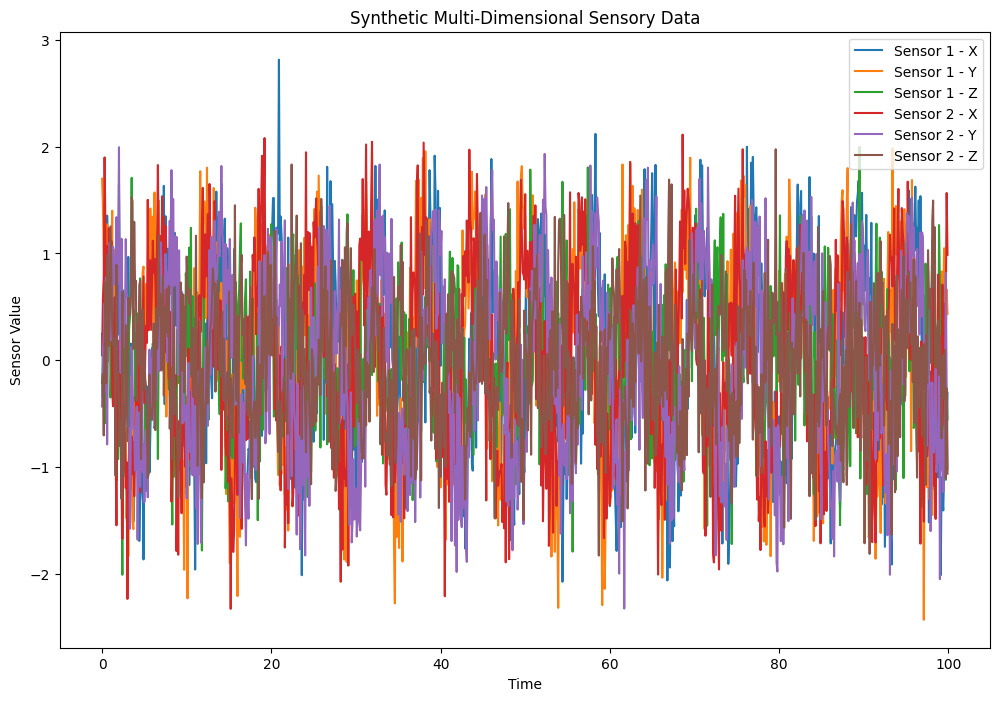

In [55]:
# Generate synthetic sensory data
np.random.seed(42)
time = np.arange(0, 100, 0.1)
sensor_1_x = np.sin(time) + np.random.normal(0, 0.5, len(time))
sensor_1_y = np.cos(time) + np.random.normal(0, 0.5, len(time))
sensor_1_z = np.sin(time) * np.cos(time) + np.random.normal(0, 0.5, len(time))

sensor_2_x = np.cos(time) + np.random.normal(0, 0.5, len(time))
sensor_2_y = np.sin(time) + np.random.normal(0, 0.5, len(time))
sensor_2_z = np.cos(time) * np.sin(time) + np.random.normal(0, 0.5, len(time))

# Create a DataFrame
data = pd.DataFrame({
    'time': time,
    'sensor_1_x': sensor_1_x,
    'sensor_1_y': sensor_1_y,
    'sensor_1_z': sensor_1_z,
    'sensor_2_x': sensor_2_x,
    'sensor_2_y': sensor_2_y,
    'sensor_2_z': sensor_2_z,
})

# Plot the data
plt.figure(figsize=(12, 8))
plt.plot(data['time'], data['sensor_1_x'], label='Sensor 1 - X')
plt.plot(data['time'], data['sensor_1_y'], label='Sensor 1 - Y')
plt.plot(data['time'], data['sensor_1_z'], label='Sensor 1 - Z')
plt.plot(data['time'], data['sensor_2_x'], label='Sensor 2 - X')
plt.plot(data['time'], data['sensor_2_y'], label='Sensor 2 - Y')
plt.plot(data['time'], data['sensor_2_z'], label='Sensor 2 - Z')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.title('Synthetic Multi-Dimensional Sensory Data')
plt.legend()
plt.show()

### Windowing the Data
We will divide the time series data into windows and extract features from each window.

In [56]:
# Define window size and step size
window_size = 50
step_size = 10

# Create rolling windows
def create_windows(data, window_size, step_size):
    windows = []
    for start in range(0, len(data) - window_size + 1, step_size):
        end = start + window_size
        window = data[start:end]
        windows.append(window)
    return windows

# Create windows for each sensor dimension
windows = create_windows(data.drop(columns=['time']), window_size, step_size)

# Convert windows to DataFrame
windowed_data = pd.concat([pd.DataFrame(window) for window in windows], axis=0)
windowed_data['id'] = np.repeat(np.arange(len(windows)), window_size)
windowed_data['time'] = np.tile(np.arange(window_size), len(windows))

# Reshape DataFrame for tsfresh
melted_data = windowed_data.melt(id_vars=['id', 'time'], var_name='feature', value_name='value')

### Extracting Features with tsfresh
Now, we will use `tsfresh` to extract features from each window.

In [57]:
# Ensure that the 'value' column in melted_data is numeric
melted_data['value'] = pd.to_numeric(melted_data['value'], errors='coerce')

# Drop any rows with NaN values that may have been introduced
melted_data = melted_data.dropna()

# Extract features using tsfresh
from tsfresh.feature_extraction import extract_features, EfficientFCParameters

# Specify the settings for the features to extract
settings = EfficientFCParameters()
extracted_features = extract_features(melted_data, column_id='id', column_sort='time', column_kind='feature', column_value='value', default_fc_parameters=settings)

# Display the number of features extracted
print(f'Number of features extracted: {extracted_features.shape[1]}')

# Display the names of the features extracted
print(f'Feature names: {extracted_features.columns.tolist()[:10]}...')

# Display a sample of the extracted features
extracted_features.head()

Feature Extraction: 100%|██████████| 576/576 [00:42<00:00, 13.70it/s]


Number of features extracted: 4662
Feature names: ['sensor_1_x__variance_larger_than_standard_deviation', 'sensor_1_x__has_duplicate_max', 'sensor_1_x__has_duplicate_min', 'sensor_1_x__has_duplicate', 'sensor_1_x__sum_values', 'sensor_1_x__abs_energy', 'sensor_1_x__mean_abs_change', 'sensor_1_x__mean_change', 'sensor_1_x__mean_second_derivative_central', 'sensor_1_x__median']...


,sensor_1_x__variance_larger_than_standard_deviation,sensor_1_x__has_duplicate_max,sensor_1_x__has_duplicate_min,sensor_1_x__has_duplicate,sensor_1_x__sum_values,sensor_1_x__abs_energy,sensor_1_x__mean_abs_change,sensor_1_x__mean_change,sensor_1_x__mean_second_derivative_central,sensor_1_x__median,...,sensor_2_z__fourier_entropy__bins_5,sensor_2_z__fourier_entropy__bins_10,sensor_2_z__fourier_entropy__bins_100,sensor_2_z__permutation_entropy__dimension_3__tau_1,sensor_2_z__permutation_entropy__dimension_4__tau_1,sensor_2_z__permutation_entropy__dimension_5__tau_1,sensor_2_z__permutation_entropy__dimension_6__tau_1,sensor_2_z__permutation_entropy__dimension_7__tau_1,sensor_2_z__query_similarity_count__query_None__threshold_0.0,sensor_2_z__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,0.0,2.000022,35.145090,0.543987,-0.043109,-0.008562,0.139361,...,0.672296,1.076988,2.524700,1.778620,2.950243,3.677957,3.806662,3.78419,NaN,1.291370
1,0.0,0.0,0.0,0.0,-10.514683,34.734708,0.532780,-0.010120,0.003795,-0.199817,...,0.618977,1.228958,2.631338,1.736913,2.972509,3.677957,3.806662,3.78419,NaN,1.293827
2,0.0,0.0,0.0,0.0,-14.566523,33.979273,0.518065,-0.028291,0.004924,-0.318530,...,0.484390,1.027989,2.578019,1.730438,2.921128,3.677957,3.775856,3.78419,NaN,1.282422
3,0.0,0.0,0.0,0.0,-10.993408,40.046250,0.593286,0.003365,-0.022570,-0.362829,...,0.484390,0.893115,2.557894,1.757211,2.920747,3.647820,3.745049,3.78419,NaN,1.224322
4,0.0,0.0,0.0,0.0,1.914628,41.903700,0.538132,0.023372,0.008153,0.059526,...,0.535961,1.143918,2.501912,1.776010,2.874743,3.647820,3.745049,3.78419,NaN,0.965869


### Generating Synthetic Labels

In [58]:
# Generate synthetic labels based on a condition
# For example, let's label windows with a mean value above a certain threshold as 1, otherwise 0
window_means = windowed_data.groupby('id')['sensor_1_x'].mean()
labels = (window_means > window_means.median()).astype(int).values

# Add labels to the features DataFrame
extracted_features['label'] = labels

### Selecting Relevant Features

In [59]:
# Impute any missing values
from tsfresh.utilities.dataframe_functions import impute
impute(extracted_features)

# Select relevant features
from tsfresh import select_features

# Select relevant features
relevant_features = select_features(extracted_features.drop(columns=['label']), extracted_features['label'])

# Display the number of relevant features selected
print(f'Number of relevant features selected: {relevant_features.shape[1]}')

/usr/local/lib/python3.10/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['sensor_1_x__fft_coefficient__attr_"real"__coeff_26'
 'sensor_1_x__fft_coefficient__attr_"real"__coeff_27'
 'sensor_1_x__fft_coefficient__attr_"real"__coeff_28' ...
 'sensor_2_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'sensor_2_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'sensor_2_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


Number of relevant features selected: 275


### Using Extracted Features for Machine Learning
Finally, we can use the extracted features for machine learning tasks.

In [60]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(relevant_features, extracted_features['label'], test_size=0.2, random_state=42)

# Train a simple classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the classifier
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


## Example: Evaluate Machine Learning Algorithms for Human Activity Recognition [Complete example can be found [here](https://machinelearningmastery.com/evaluate-machine-learning-algorithms-for-human-activity-recognition/)]

The following data was collected from 30 subjects aged between 19 and 48 years old performing one of six standard activities while wearing a waist-mounted smartphone that recorded the movement data. Video was recorded of each subject performing the activities and the movement data was labeled manually from these videos.

The six activities performed:

1. Walking
2. Walking Upstairs
3. Walking Downstairs
4. Sitting
5. Standing
6. Laying

The movement data recorded was the x, y, and z accelerometer data (linear acceleration) and gyroscopic data (angular velocity) from the smart phone, specifically a Samsung Galaxy S II. Observations were recorded at 50 Hz (i.e. 50 data points per second). Each subject performed the sequence of activities twice, once with the device on their left-hand-side and once with the device on their right-hand side.

The raw data is not available. Instead, a pre-processed version of the dataset was made available. The pre-processing steps included:

* Pre-processing accelerometer and gyroscope using noise filters.
* Splitting data into fixed windows of 2.56 seconds (128 data points) with 50% overlap.
* Splitting of accelerometer data into gravitational (total) and body motion components.

Feature engineering was applied to the window data, and a copy of the data with these engineered features was made available.

A number of time and frequency features commonly used in the field of human activity recognition were extracted from each window. The result was a 561 element vector of features.

The dataset was split into train (70%) and test (30%) sets based on data for subjects, e.g. 21 subjects for train and nine for test.

Experiment results with a support vector machine intended for use on a smartphone (e.g. fixed-point arithmetic) resulted in a predictive accuracy of 89% on the test dataset, achieving similar results as an unmodified SVM implementation.

The dataset is freely available and can be downloaded from the UCI Machine Learning repository.

### Modeling Feature Engineered Data
In this section, we will develop code to load the feature-engineered version of the dataset and evaluate a suite of nonlinear machine learning algorithms, including SVM used in the original paper.

The goal is to achieve at least 89% accuracy on the test dataset.

The results of methods using the feature-engineered version of the dataset provide a baseline for any methods developed for the raw data version.

This section is divided into five parts; they are:

* Load Dataset
* Define Models
* Evaluate Models
* Summarize Results
* Complete Example


### Load Dataset
The first step is to load the train and test input (X) and output (y) data.

Specifically, the following files:

* HARDataset/train/X_train.txt
* HARDataset/train/y_train.txt
* HARDataset/test/X_test.txt
* HARDataset/test/y_test.txt

The input data is in CSV format where columns are separated via whitespace. Each of these files can be loaded as a NumPy array.

The *load_file*() function below loads a dataset given the file path to the file and returns the loaded data as a NumPy array.

In [61]:
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

We can call this function to load the X and y files for a given train or test set group, given the similarity in directory layout and filenames.  The *load_dataset_group*() function below will load both of these files for a group and return the X and y elements as NumPy arrays. This function can then be used to load the X and y elements for both the train and test groups.

In [77]:
# load a dataset group, such as train or test
def load_dataset_group(group, prefix='https://raw.githubusercontent.com/HPI-CH/DS4W-2024/main/Datasets/'):
	# load input data
	X = load_file(prefix + group + '/X_'+group+'.txt')
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

Finally, we can load both the train and test dataset and return them as NumPy arrays ready for fitting and evaluating machine learning models.

In [78]:
# load the dataset, returns train and test X and y elements
def load_dataset(prefix='https://raw.githubusercontent.com/HPI-CH/DS4W-2024/main/Datasets/'):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'UCI_HAR_Dataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'UCI_HAR_Dataset/')
	print(testX.shape, testy.shape)
	# flatten y
	trainy, testy = trainy[:,0], testy[:,0]
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

### Load Packages

In [79]:
# spot check on engineered-features
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

We can call this function to load all of the required data; for example:

In [80]:
# load dataset
trainX, trainy, testX, testy = load_dataset()

(7352, 561) (7352, 1)
(2947, 561) (2947, 1)
(7352, 561) (7352,) (2947, 561) (2947,)


### Define Models
Next, we can define a list of machine learning models to evaluate on this problem.

We will evaluate the models using default configurations. We are not looking for optimal configurations of these models at this point, just a general idea of how well sophisticated models with default configurations perform on this problem.

We will evaluate a diverse set of nonlinear and ensemble machine learning algorithms, specifically:

Nonlinear Algorithms:

* k-Nearest Neighbors
* Classification and Regression Tree
* Support Vector Machine
* Naive Bayes

Ensemble Algorithms:

* Bagged Decision Trees
* Random Forest
* Extra Trees
* Gradient Boosting Machine

We will define the models and store them in a dictionary that maps the model object to a short name that will help in analyzing the results.

The *define_models*() function below defines the eight models that we will evaluate.

In [81]:
# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
	# nonlinear models
	models['knn'] = KNeighborsClassifier(n_neighbors=7)
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	# ensemble models
	models['bag'] = BaggingClassifier(n_estimators=100)
	models['rf'] = RandomForestClassifier(n_estimators=100)
	models['et'] = ExtraTreesClassifier(n_estimators=100)
	models['gbm'] = GradientBoostingClassifier(n_estimators=100)
	print('Defined %d models' % len(models))
	return models

This function is quite extensible and you can easily update to define any machine learning models or model configurations you wish.

### Evaluate Models
The next step is to evaluate the defined models in the loaded dataset.

This step is divided into the evaluation of a single model and the evaluation of all of the models.

We will evaluate a single model by first fitting it on the training dataset, making a prediction on the test dataset, and then evaluating the prediction using a metric. In this case we will use classification accuracy that will capture the performance (or error) of a model given the balance observations across the six activities (or classes).

The *evaluate_model*() function below implements this behavior, evaluating a given model and returning the classification accuracy as a percentage.

In [82]:
# evaluate a single model
def evaluate_model(trainX, trainy, testX, testy, model):
	# fit the model
	model.fit(trainX, trainy)
	# make predictions
	yhat = model.predict(testX)
	# evaluate predictions
	accuracy = accuracy_score(testy, yhat)
	return accuracy * 100.0

We can now call the *evaluate_model*() function repeatedly for each of the defined model.

The *evaluate_models*() function below implements this behavior, taking the dictionary of defined models, and returns a dictionary of model names mapped to their classification accuracy.

Because the evaluation of the models may take a few minutes, the function prints the performance of each model after it is evaluated as some verbose feedback.

In [83]:
# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(trainX, trainy, testX, testy, models):
	results = dict()
	for name, model in models.items():
		# evaluate the model
		results[name] = evaluate_model(trainX, trainy, testX, testy, model)
		# show process
		print('>%s: %.3f' % (name, results[name]))
	return results

### Summarize Results
The final step is to summarize the findings.

We can sort all of the results by the classification accuracy in descending order because we are interested in maximizing accuracy.

The results of the evaluated models can then be printed, clearly showing the relative rank of each of the evaluated models.

The *summarize_results*() function below implements this behavior.

In [84]:
# print and plot the results
def summarize_results(results, maximize=True):
	# create a list of (name, mean(scores)) tuples
	mean_scores = [(k,v) for k,v in results.items()]
	# sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	# reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	print()
	for name, score in mean_scores:
		print('Name=%s, Score=%.3f' % (name, score))

### Run Code

In [85]:
# load dataset
trainX, trainy, testX, testy = load_dataset()
# get model list
models = define_models()
# evaluate models
results = evaluate_models(trainX, trainy, testX, testy, models)
# summarize results
summarize_results(results)

(7352, 561) (7352, 1)
(2947, 561) (2947, 1)
(7352, 561) (7352,) (2947, 561) (2947,)
Defined 8 models
>knn: 90.329
>cart: 85.680
>svm: 95.046
>bayes: 77.027
>bag: 90.193
>rf: 91.347
>et: 94.469
>gbm: 93.892

Name=svm, Score=95.046
Name=et, Score=94.469
Name=gbm, Score=93.892
Name=rf, Score=91.347
Name=knn, Score=90.329
Name=bag, Score=90.193
Name=cart, Score=85.680
Name=bayes, Score=77.027


### Modeling Raw Data
We can use the same framework for evaluating machine learning models on the raw data.

The raw data does require some more work to load.

There are three main signal types in the raw data: total acceleration, body acceleration, and body gyroscope. Each has three axes of data. This means that there are a total of nine variables for each time step.

Further, each series of data has been partitioned into overlapping windows of 2.65 seconds of data, or 128 time steps. These windows of data correspond to the windows of engineered features (rows) in the previous section.

This means that one row of data has 128 * 9 or 1,152 elements. This is a little less than double the size of the 561 element vectors in the previous section and it is likely that there is some redundant data.

The signals are stored in the */Inertial Signals/* directory under the train and test subdirectories. Each axis of each signal is stored in a separate file, meaning that each of the train and test datasets have nine input files to load and one output file to load. We can batch the loading of these files into groups given the consistent directory structures and file naming conventions.

First, we can load all data for a given group into a single three-dimensional NumPy array, where the dimensions of the array are [samples, time steps, features]. To make this clearer, there are 128 time steps and nine features, where the number of samples is the number of rows in any given raw signal data file.

The *load_group*() function below implements this behavior. The *dstack*() NumPy function allows us to stack each of the loaded 3D arrays into a single 3D array where the variables are separated on the third dimension (features).

In [87]:
# spot check on raw data
from numpy import dstack
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files into a 3D array of [samples, timesteps, features]
def load_group(filenames, prefix='https://raw.githubusercontent.com/HPI-CH/DS4W-2024/main/Datasets/'):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix='https://raw.githubusercontent.com/HPI-CH/DS4W-2024/main/Datasets/'):
	filepath = prefix + group + '/Inertial%20Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix='https://raw.githubusercontent.com/HPI-CH/DS4W-2024/main/Datasets/'):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'UCI_HAR_Dataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'UCI_HAR_Dataset/')
	print(testX.shape, testy.shape)
	# flatten X
	trainX = trainX.reshape((trainX.shape[0], trainX.shape[1] * trainX.shape[2]))
	testX = testX.reshape((testX.shape[0], testX.shape[1] * testX.shape[2]))
	# flatten y
	trainy, testy = trainy[:,0], testy[:,0]
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
	# nonlinear models
	models['knn'] = KNeighborsClassifier(n_neighbors=7)
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	# ensemble models
	models['bag'] = BaggingClassifier(n_estimators=100)
	models['rf'] = RandomForestClassifier(n_estimators=100)
	models['et'] = ExtraTreesClassifier(n_estimators=100)
	models['gbm'] = GradientBoostingClassifier(n_estimators=100)
	print('Defined %d models' % len(models))
	return models

# evaluate a single model
def evaluate_model(trainX, trainy, testX, testy, model):
	# fit the model
	model.fit(trainX, trainy)
	# make predictions
	yhat = model.predict(testX)
	# evaluate predictions
	accuracy = accuracy_score(testy, yhat)
	return accuracy * 100.0

# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(trainX, trainy, testX, testy, models):
	results = dict()
	for name, model in models.items():
		# evaluate the model
		results[name] = evaluate_model(trainX, trainy, testX, testy, model)
		# show process
		print('>%s: %.3f' % (name, results[name]))
	return results

# print and plot the results
def summarize_results(results, maximize=True):
	# create a list of (name, mean(scores)) tuples
	mean_scores = [(k,v) for k,v in results.items()]
	# sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	# reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	print()
	for name, score in mean_scores:
		print('Name=%s, Score=%.3f' % (name, score))

# load dataset
trainX, trainy, testX, testy = load_dataset()
# get model list
models = define_models()
# evaluate models
results = evaluate_models(trainX, trainy, testX, testy, models)
# summarize results
summarize_results(results)

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 1152) (7352,) (2947, 1152) (2947,)
Defined 8 models
>knn: 61.893
>cart: 72.107
>svm: 88.734
>bayes: 72.480
>bag: 84.391
>rf: 84.628
>et: 87.106
>gbm: 87.241

Name=svm, Score=88.734
Name=gbm, Score=87.241
Name=et, Score=87.106
Name=rf, Score=84.628
Name=bag, Score=84.391
Name=bayes, Score=72.480
Name=cart, Score=72.107
Name=knn, Score=61.893
